In [251]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

In [252]:
def generate_dataset(cls, N=100):
    """
    """
    theta = np.sqrt(np.random.rand(N))*2*pi

    arms = []
    sep = 3.0 / (cls-1)

    for idx in range(cls):
        r = 6 * (theta*pi/2)
        data = np.array([np.cos(theta + pi/sep * idx)*r, np.sin(theta + pi/sep * idx)*r]).T
        x = data + np.random.randn(N,2)
        res = np.append(x, np.array([[idx] * N]).T,axis=1)
        arms.append(res)

    res = np.concatenate(arms, axis=0)
    np.random.shuffle(res)

    return res

In [253]:
def draw_decision_boundary(model,
                        X: np.ndarray,
                        r: float = 0.02,
                        fill: bool = True):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        #define the corner points for a rectangle that
        #encapsulates our (2d) feature plane
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #generate points on this plane 
        #that splits the plane into a grid
        xx1, xx2 = np.meshgrid(
                np.arange(x1_min, x1_max, r),
                np.arange(x2_min, x2_max, r)
        )

        #generate predictions for everypoint in this grid
        #using the trained model
        pred = model.predict(
                np.array([xx1.ravel(), xx2.ravel()]).T
        )

        pred = pred.reshape(xx1.shape)

        colors = ['blue','red','green']
        if pred[0][0] == 0:
                colors = colors[::-1]
                
        cmap = ListedColormap(colors)
        if fill:
                plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)
        else:
                plt.contour(xx1, xx2, pred, alpha=0.3, cmap=cmap)

/home/cake/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Success Rate: 20000.00%


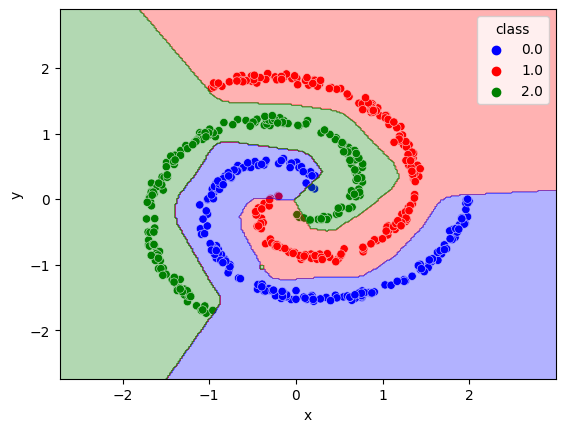

In [254]:
res = generate_dataset(3)
df = pd.DataFrame(res, columns=["x","y","class"])
for col in ['x','y']:
    mean = df[col].mean()
    std  = df[col].std()

    df[col] = df[col]\
                .apply(lambda x: (x - mean) / std)
X,y = df[['x','y']].to_numpy(), df[['class']].to_numpy()
clf = MLPClassifier(random_state=1, 
                    max_iter=10000, 
                    hidden_layer_sizes=(100,),
                    activation='relu'
                    ).fit(X,y)
predict = clf.predict(X)
error_rate = 100 * (len(y) - np.equal(predict,y).sum())/len(y)
print(f"Success Rate: {100 - error_rate:.2f}%")
colors = ['blue','red','green']
cmap = ListedColormap(colors)
sns.scatterplot(data=df, x='x',y='y',hue='class',palette=cmap)
draw_decision_boundary(clf, X)